## 딥 러닝의 학습 방법
- https://wikidocs.net/36033
- 학습 방법의 이해를 위해 필요한 개념
- 손실 함수, 옵티마이저, 에포크의 개념에 대해 정리하는 챕터

### 손실 함수(Loss function)
- 손실함수: 실제값과 예측값의 차이를 수치화해주는 함수
    - 오차가 클 수록 손실 함수의 값은 크고 오차가 작을 수록 손실 함수의 값은 작아짐
    - 회귀에서는 평균 제곱 오차, 분류 문제에서는 크로스 엔트로피를 주로 손실 함수로 사용
    - 손실 함수의 값을 최소화하는 두 개의 매개변수인 가중치 w와 편향 b의 값을 찾는 것이 딥 러닝의 학습 과정

#### MSE(Mean Squared Error, MSE)
- 평균 제곱 오차는 선형 회귀를 학습할 때 배웠던 손실 함수
- 연속형 변수를 예측할 때 사용

In [ ]:
# compile의 loss에 문자열 'mse'라고 기재하여 사용
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [ ]:
# compile의 loss는 tf.keras.losses.Loss 인스턴스를 호출
# 아래와 같이도 사용 가능
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['mse'])

#### 이진 크로스 엔트로피(Binary Cross-Entropy)
- 자연어 처리는 대부분 분류 문제이므로 평균 제곱 오차보다는 아래의 크로스 엔트로피 함수들을 주로 사용
- 이항 교차 엔트로피라고도 부르는 손실 함수
- 출력층에서 시그모이드 함수를 사용하는 이진 분류 (Binary Classification)의 경우 binary_crossentropy를 사용
- compile의 loss에 문자열로 'binary_crossentropy'를 기재
- 로지스틱 회귀에서 사용했던 손실 함수

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
# compile의 loss는 tf.keras.losses.Loss 인스턴스를 호출
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=['acc'])

#### 카테고리칼 크로스 엔트로피(Categorical Cross-Entropy)
- 범주형 교차 엔트로피라고도 부르는 손실 함수
- 출력층에서 소프트맥스 함수를 사용하는 다중 클래스 분류(Multi-Class Classification)일 경우 categorical_crossentropy를 사용
- compile의 loss에 문자열로 'categorical_crossentropy'를 기재
- 소프트맥스 회귀에서 사용했던 손실 함수

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
# compile의 loss는 tf.keras.losses.Loss 인스턴스 호출
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['acc'])

In [ ]:
# 레이블에 대해서 원-핫 인코딩 과정을 생략
# 정수값을 가진 레이블에 대해서 다중 클래스 분류를 수행하고 싶다면
#  'sparse_categorical_crossentropy'를 사용
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])


In [ ]:
# 아래와 같이도 사용 가능
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['acc'])

#### 그 외에 다양한 손실 함수들
- 그 외에도 다양한 손실함수가 있음

### 배치 크기(Batch Size)에 따른 경사 하강법
- 손실 함수의 값을 줄여나가면서 학습하는 방법은 어떤 옵티마이저를 사용하느냐에 따라 달라짐
- 배치(Batch) 라는 개념
    - 가중치 등의 매개 변수의 값을 조정하기 위해 사용하는 데이터의 양을 의미
        - 전체 데이터를 가지고 매개 변수의 값을 조정 가능
        - 정해준 양의 데이터만 가지고도 매개 변수의 값을 조정 가능
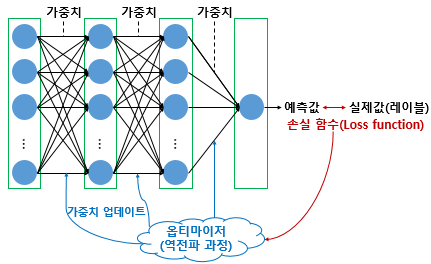

#### 배치 경사 하강법(Batch Gradient Descent)
- 가장 기본적인 경사 하강법
- 옵티마이저 중 하나로 오차(loss)를 구할 때 전체 데이터를 고려
- 배치 경사 하강법은 한 번의 에포크에 모든 매개변수 업데이트를 단 한 번 수행
    - 전체 데이터에 대한 한 번의 훈련 횟수를 1 에포크라고 함
- 전체 데이터를 고려해 학습하기 때문에, 한 번의 매개 변수 업데이트에 시간이 오래 걸리며, 메모리를 크게 요구한다는 단점 존재

In [ ]:
model.fit(X_train, y_train, batch_size=len(X_train))

#### 배치 크기가 1인 확률적 경사 하강법(Stochastic Gradient Descent, SGD)
- 배치 크기가 1인 확률적 경사 하강법: 매개변수 값을 조정 시 전체 데이터가 아니라 랜덤으로 선택한 하나의 데이터에 대해서만 계산하는 방법
- 더 적은 데이터를 사용하므로 더 빠르게 계산 가능
- 그림
    - 좌측은 배치 경사 하강법, 우측은 배치 크기가 1인 확률적 경사 하강법이 최적해를 찾아가는 모습
    - 매개변수의 변경폭이 불안정하고, 때로는 배치 경사 하강법보다 정확도가 낮을 수도 있지만 하나의 데이터에 대해서만 메모리에 저장하면 되므로 자원이 적은 컴퓨터에서도 쉽게 사용가능 하다는 장점

In [ ]:
# 케라스에서는 다음과 같이 코드 사용
model.fit(X_train, y_train, batch_size=1)

#### 미니 배치 경사 하강법(Mini-Batch Gradient Descent)
- 미니 배치 경사 하강법: 배치 크기를 지정(전체 데이터도, 1개의 데이터도 아님)하여 해당 데이터 개수만큼에 대해서 계산하여 매개 변수의 값을 조정하는 경사 하강법
- 미니 배치 경사 하강법은 전체 데이터를 계산하는 것보다 빠름
- SGD보다 안정적
- 가장 많이 사용되는 경사 하강법
- 배치 크기는 일반적으로 2의 n제곱에 해당하는 숫자로 선택하는 것이 보편적
    - model.fit()에서 배치 크기를 별도로 지정해주지 않을 경우, 기본값은 32로 설정됨

In [ ]:
# 배치 크기를 128로 지정했을 경우
model.fit(X_train, y_train, batch_size=128)

### 옵티마이저(Optimizer)
- 앞으로는 경사 하강법의 알고리즘 자체를 조금씩 달리한 다양한 옵티마이저에 대해서 설명

#### 모멘텀(Momentum)
- 모멘텀(Momentum): 관성이라는 물리학의 법칙을 응용한 방법
    - 경사 하강법에 관성을 더 해줌
    - 경사 하강법에서 계산된 접선의 기울기에 한 시점 전의 접선의 기울기값을 일정한 비율만큼 반영
- 로컬 미니멈에 도달하였을 때 글로벌 미니멈으로 잘못 인식하여 탈출하지 못하였을 상황
    - 모멘텀은 관성의 힘을 빌려 값이 조절됨. 현지의 로컬 미니멈에서 탈출하고 글로벌 미니멈 내지는 더 낮은 로컬 미니멈으로 갈 수 있는 효과

In [ ]:
tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)

#### 아다그라드(Adagrad)
- 아다그라드: 각 매개변수에 서로 다른 학습률을 적용
    - 모든 매개변수에 동일한 학습률(learning rate)을 적용하는 것은 비효율적
    - 변화가 많은 매개변수는 학습률이 작게 설정되고 변화가 적은 매개변수는 학습률을 높게 설정

In [ ]:
tf.keras.optimizers.Adagrad(lr=0.01, epsilon=1e-6)

#### 3) 알엠에스프롭(RMSprop)
-  알엠에스프롭: 아다그라드의 단점개선
    - 아다그라드의 단점: 학습 계속 진행하는 경우, 나중에 학습률이 지나치게 떨어짐. 
    - 이를 다른 수식으로 대체한 방식

In [ ]:
tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-06)

#### 아담(Adam)
- 알엠에스프롭과 모멘텀 두 가지를 합친 듯한 방법
- 방향과 학습률 두 가지를 모두 잡기 위한 방법

In [ ]:
tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

#### 사용 방법
- 옵티마이저 인스턴스는 compile의 optimizer에서 호출
- 단순히 문자열로 'adam'으로 작성하더라도 동작

In [ ]:
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

### 에포크와 배치 크기와 이터레이션(Epochs and Batch size and Iteration)
- 머신 러닝에서 학습 과정이란
    - 기계가 실제값과 예측값의 오차로부터 옵티마이저를 통해서 가중치를 업데이트 하는것
- 사람에 비유하자면
    - 문제지의 문제를 풀고, 정답지의 정답을 보면서 채점을 하면서 부족했던 점을 깨달으며 머릿속의 지식이 업데이트되는 과정
- 공부방법은 다 다름
    - 한 문제 풀고 정답 채점 VS 10개 단위로 끊어서 공부
    - 문제지 세 번 공부 VS 외울만큼 100번씩 공부
- 이처럼 기계의 공부방법 설정 가능
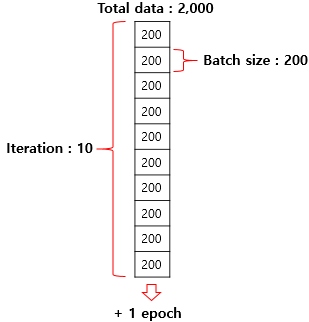

#### 에포크(Epoch)
- 에포크: 인공 신경망에서 전체 데이터에 대해서 순전파와 역전파가 끝난 상태
    - 비유) 문제를 끝까지 풀고, 정답지로 채점해서 문제지에 대한 공부를 한 번 끝낸 상태
    - 만약 에포크=50, 전체 데이터 단위로 총 50번 학습
    - 에포크 횟수가 지나치거나 너무 적으면 앞서 배운 과적합과 과소적합이 발생 가능

#### 배치 크기(Batch size
- 배치 크기: 몇 개의 데이터 단위로 매개변수를 업데이트하는지
    - 비유) 문제지에서 문제를 몇 개씩 풀고 정답지를 확인해서 지식 업데이트 하느냐
    - 기계 입장에서는 실제값과 예측값으로부터 오차를 계산하고 옵티마이저가 매개변수를 업데이트
    - 사람이 2,000 문제가 수록되어있는 문제지의 문제를 200개 단위로 풀고 채점한다고 하면 이때 배치 크기는 200
    - 기계는 배치 크기가 200이면 200개의 샘플 단위로 가중치를 업데이트
- 배치 크기 != 배치의 수
    - 전체 데이터가 2,000일때 배치 크기를 200으로 준다면 배치의 수는 10
    - 배치의 수 = 이터레이션

#### 이터레이션(Iteration) 또는 스텝(Step)
- 이터레이션: 한 번의 에포크를 끝내기 위해서 필요한 배치의 수
    - 한 번의 에포크 내에서 이루어지는 매개변수의 업데이트 횟수
    - 전체 데이터가 2,000일 때 배치 크기를 200으로 한다면 이터레이션의 수는 총 10
    - 이는 한 번의 에포크 당 매개변수 업데이트가 10번 이루어진다는 것을 의미
    - 이터레이션은 스텝(Step)이라고도 부름